In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import sys
from daphne import daphne
from evaluator import evaluate

def load_exp(num):
    return daphne(['desugar-hoppl', '-i', '../a5/programs/{}.daphne'.format(num)])

# Program 1

In [2]:
sys.setrecursionlimit(8000)

exp = load_exp(1)
num_samples = int(1e5)
samples = []

start = time.time()
for i in range(num_samples):
    samples.append(evaluate(exp).item())
end = time.time()

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Prior mean: {:.3f}".format(np.mean(samples)))
print("Prior variance: {:.3f}".format(np.var(samples)))

Number of samples: 100000
Sampling time: 485 seconds
Prior mean: 99.223
Prior variance: 10021.074


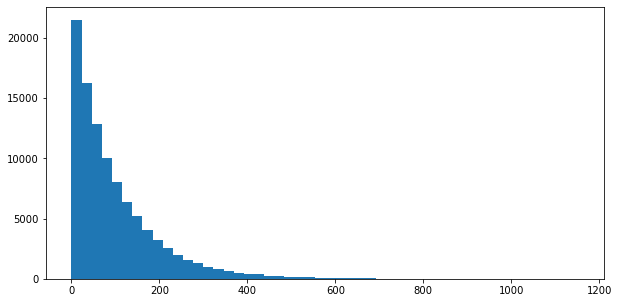

In [8]:
plt.figure(figsize=(10,5))
plt.hist(samples, bins=50)
plt.savefig("figs/p1_hist.png")

# Program 2

In [12]:
exp = load_exp(2)
num_samples = int(1e6)
samples = []

start = time.time()
for i in range(num_samples):
    samples.append(evaluate(exp).item())
end = time.time()

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
print("Prior mean of mu: {:.3f}".format(np.mean(samples)))
print("Prior variance of mu: {:.3f}".format(np.var(samples)))

Number of samples: 1000000
Sampling time: 295 seconds
Prior mean of mu: 0.999
Prior variance of mu: 5.003


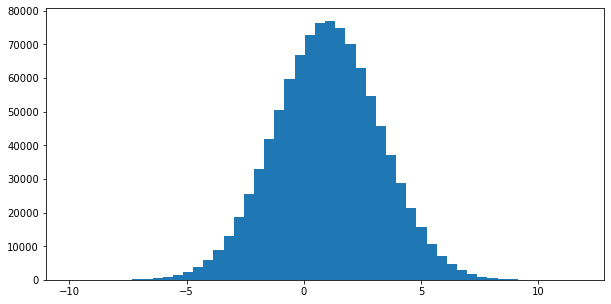

In [13]:
plt.figure(figsize=(10,5))
plt.hist(samples, bins=50)
plt.savefig("figs/p2_hist.png")

# Program 3

In [2]:
exp = load_exp(3)
num_samples = int(1e5)
samples = []

start = time.time()
for i in range(num_samples):
    samples.append(evaluate(exp).numpy().tolist())
end = time.time()
samples = np.array(samples)

print("Number of samples: {}".format(num_samples))
print("Sampling time: {} seconds".format(int(end-start)))
np.set_printoptions(threshold=np.inf, formatter={'float_kind': "{:.4f}".format})
print("Prior mean of each time step:\n", np.mean(samples, axis=0, keepdims=False))
print("Prior variance of each time step:\n", np.var(samples, axis=0, keepdims=False))

Number of samples: 100000
Sampling time: 210 seconds
Prior mean of each time step:
 [0.9980 1.4133 1.4670 1.4817 1.4794 1.4823 1.4772 1.4824 1.4782 1.4776
 1.4777 1.4823 1.4798 1.4809 1.4790 1.4800 1.4812]
Prior variance of each time step:
 [0.6683 0.5440 0.5642 0.5536 0.5558 0.5518 0.5600 0.5548 0.5588 0.5568
 0.5581 0.5550 0.5543 0.5536 0.5545 0.5558 0.5551]


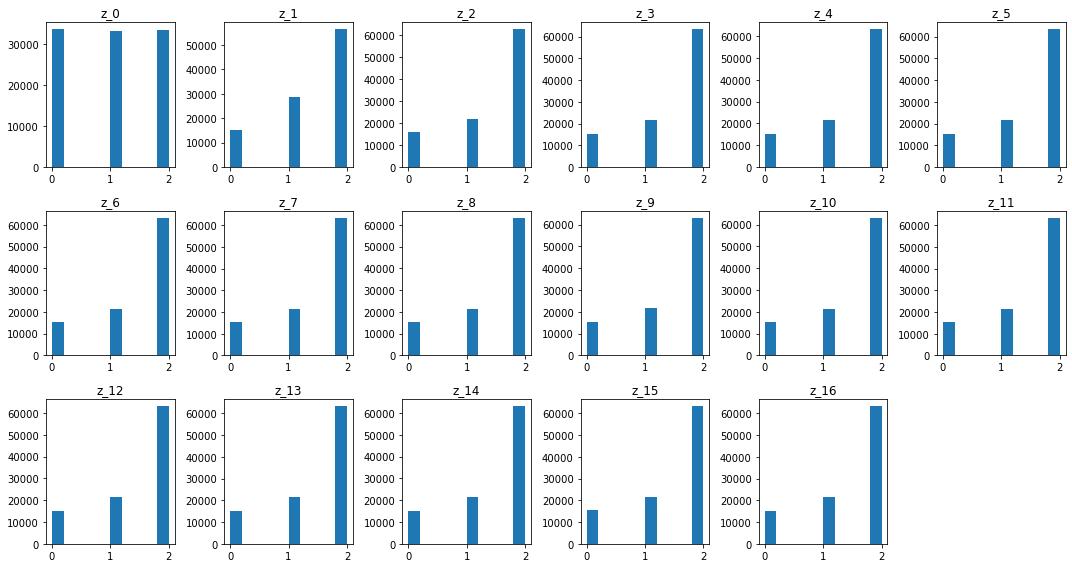

In [3]:
plt.figure(figsize=(15, 8))
for i in range(17):
    plt.subplot(3, 6, i+1)
    plt.hist(samples[:, i])
    plt.title("z_{}".format(i))
plt.tight_layout()
plt.savefig("figs/p3_hist.png")